# Test of Operators

In [1]:
import sympy
import matplotlib.pyplot as plt
import networkx as nx

from pympo.operators import OpSite, SumOfProducts, get_eye_site

In [2]:
Ising = SumOfProducts([])
J = sympy.Symbol('J')
h = sympy.Symbol('h')
spin_ops = [OpSite(r'\hat{s}'+f'_{i}', i) for i in range(6)]
for i in range(5):
    #print((-J * spin_ops[i] * spin_ops[i+1] - h * spin_ops[i]).symbol)
    x = (-J * spin_ops[i] * spin_ops[i+1]) 
    y = (- h * spin_ops[i])
    z = x + y
    Ising += z
Ising.symbol

-J*\hat{s}_0*\hat{s}_1 - J*\hat{s}_1*\hat{s}_2 - J*\hat{s}_2*\hat{s}_3 - J*\hat{s}_3*\hat{s}_4 - J*\hat{s}_4*\hat{s}_5 - \hat{s}_0*h - \hat{s}_1*h - \hat{s}_2*h - \hat{s}_3*h - \hat{s}_4*h

In [ ]:
flow: list[list[int]] = [[] for i in range(Ising.ndim)]

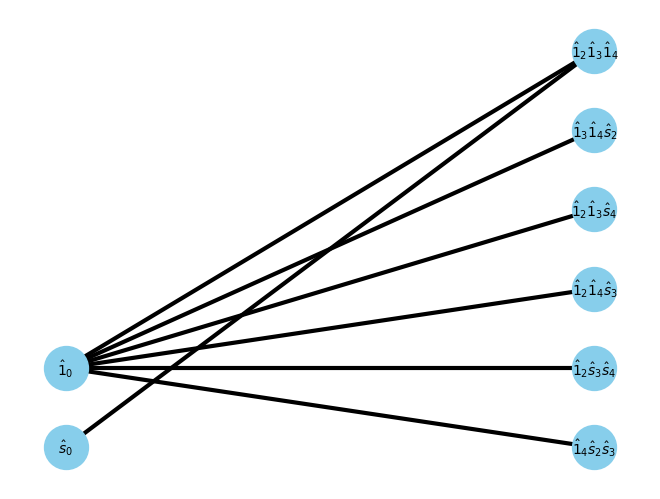

In [3]:
Usym = set()
Vsym = set()
Esym = set()
i = 1
ndim = Ising.ndim
for prod_op in Ising.ops:
    U_op = prod_op[0:i]
    V_op = prod_op[i+1:ndim]
    Usym.add(U_op)
    Vsym.add(V_op)
    Esym.add((U_op, V_op))

U = [f"${sympy.latex(node)}$" for node in Usym]
V = [f"${sympy.latex(node)}$" for node in Vsym]
E = [(f"${sympy.latex(edge[0])}$", f"${sympy.latex(edge[1])}$") for edge in Esym]


G = nx.Graph()
for node in U:
    G.add_node(node, bipartite=0)
for node in V:
    G.add_node(node, bipartite=1)
for edge in E:
    G.add_edge(edge[0], edge[1])


pos = {node: (0, i) for i, node in enumerate(U)} 
pos |= {node: (1, i) for i, node in enumerate(V)}
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=10, font_weight='bold', edge_color='black', width=3)
plt.show()

In [4]:
max_matching = nx.bipartite.maximum_matching(G)
max_matching

{'$\\hat{1}_0$': '$\\hat{1}_2 \\hat{1}_4 \\hat{s}_3$',
 '$\\hat{s}_0$': '$\\hat{1}_2 \\hat{1}_3 \\hat{1}_4$',
 '$\\hat{1}_2 \\hat{1}_3 \\hat{1}_4$': '$\\hat{s}_0$',
 '$\\hat{1}_2 \\hat{1}_4 \\hat{s}_3$': '$\\hat{1}_0$'}

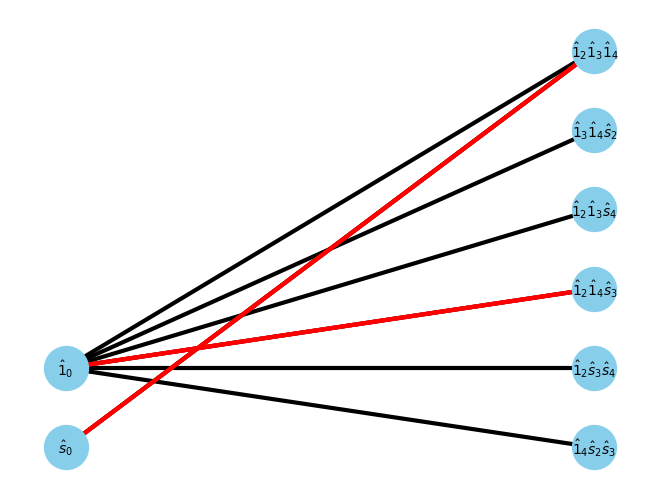

In [5]:
# Fill maxmatching with red
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=10, font_weight='bold', edge_color='black', width=3)
nx.draw_networkx_edges(G, pos, edgelist=max_matching.items(), edge_color='red', width=3)
plt.show()

In [6]:
min_cover = nx.bipartite.to_vertex_cover(G, max_matching)
min_cover

{'$\\hat{1}_0$', '$\\hat{s}_0$'}

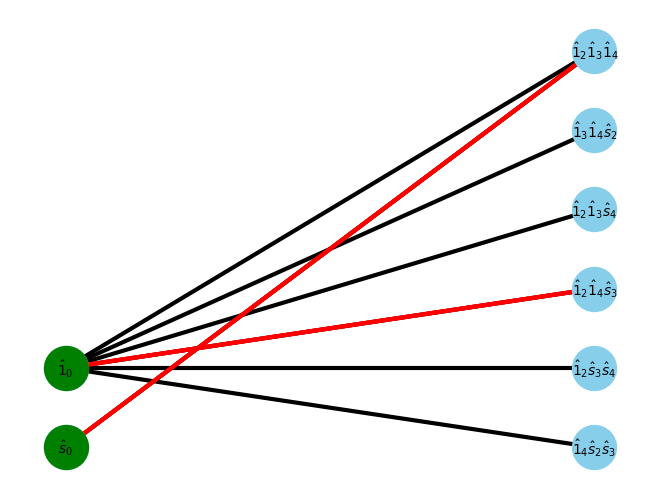

In [7]:
# Fill mincover with green
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=10, font_weight='bold', edge_color='black', width=3)
nx.draw_networkx_edges(G, pos, edgelist=max_matching.items(), edge_color='red', width=3)
nx.draw_networkx_nodes(G, pos, nodelist=min_cover, node_color='green', node_size=1000)
plt.show()

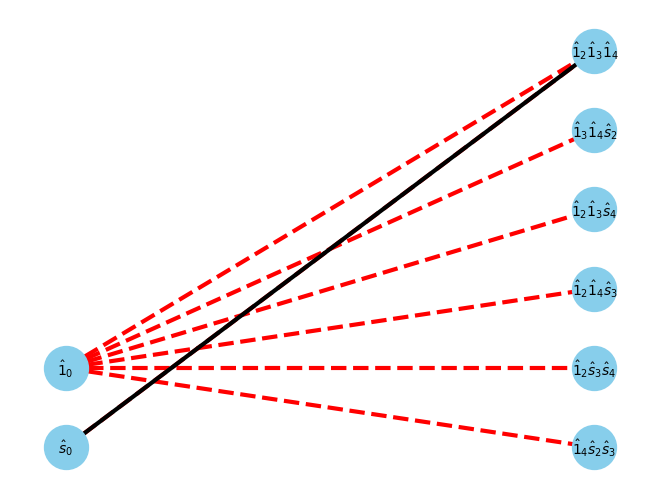

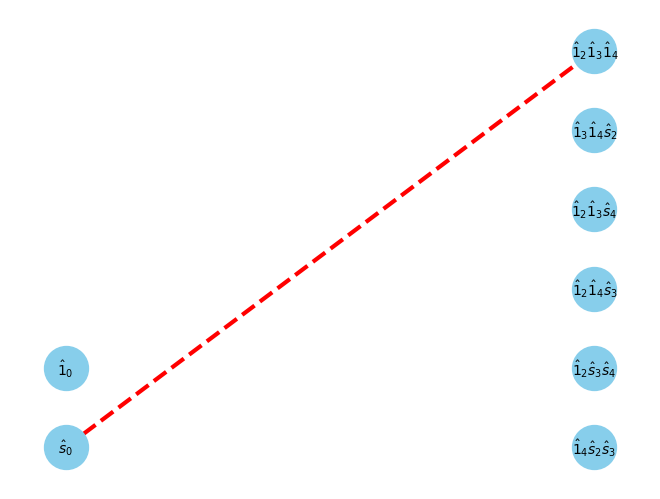

Matrix([[\hat{1}_0, \hat{s}_0]])

In [ ]:
Unew = []
U0 = []
for vertex in min_cover:
    if vertex in U:
        Unew.append(vertex)
        # remove the edge connected to the vertex
        new_E = []
        for edge in E:
            if vertex != edge[0]:
                new_E.append(edge)
        # visualize the remaining edges and vertices
        G = nx.Graph()
        for node in U:
            G.add_node(node, bipartite=0)
        for node in V:
            G.add_node(node, bipartite=1)
        for edge in E:
            G.add_edge(edge[0], edge[1])
        E = new_E.copy() # 
        nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=10, font_weight='bold', edge_color='red', width=3, style='dashed')
        for new_edge in new_E:
            nx.draw_networkx_edges(G, pos, edgelist=[new_edge], edge_color='black', width=3,)
        plt.show()
    else:
        print(f"Vertex {vertex} is not in U")
        raise NotImplementedError
    W0 = sympy.zeros(1, len(Unew))
    for i, vertex in enumerate(Unew):
        W0[0, i] = sympy.Symbol(vertex.strip('$')) # 実際に掛け算を実行した方が良いかも
        U0.append(sympy.Symbol(vertex.strip('$'))) # 実際に掛け算を実行した方が良いかも
W0

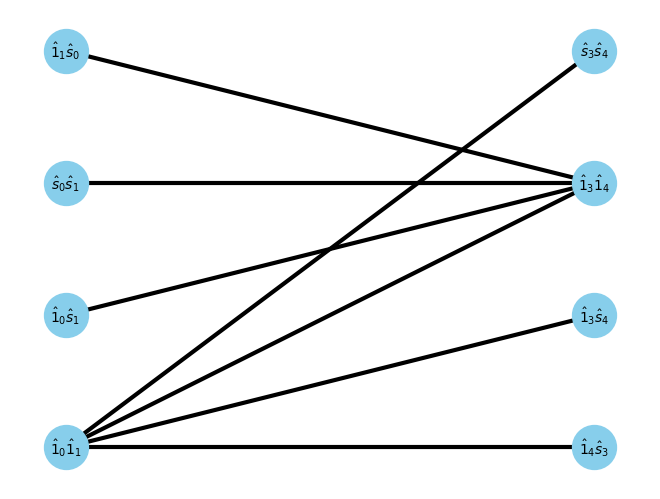

In [9]:

Usym = set()
Vsym = set()
Esym = set()
i = 2
for prod_op in Ising.ops:
    U_0toi = prod_op[0:i]
    #U_i = prod_op[i]
    # 本当は、U_iとU0の積を取る必要がある。（未実装)
    # そのためには、SumOfProducts全体でクラスタリングされた情報を格納する必要がある。
    
    V_op = prod_op[i+1:ndim]
    #raise NotImplementedError
    U_op = U_0toi
    
    Usym.add(U_op)
    
    Vsym.add(V_op)
    Esym.add((U_op, V_op))

U = [f"${sympy.latex(node)}$" for node in Usym]
V = [f"${sympy.latex(node)}$" for node in Vsym]
E = [(f"${sympy.latex(edge[0])}$", f"${sympy.latex(edge[1])}$") for edge in Esym]


G = nx.Graph()
for node in U:
    G.add_node(node, bipartite=0)
for node in V:
    G.add_node(node, bipartite=1)
for edge in E:
    G.add_edge(edge[0], edge[1])


pos = {node: (0, i) for i, node in enumerate(U)} 
pos |= {node: (1, i) for i, node in enumerate(V)}
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=10, font_weight='bold', edge_color='black', width=3)
plt.show()

In [10]:
max_matching = nx.bipartite.maximum_matching(G)
max_matching

{'$\\hat{s}_0 \\hat{s}_1$': '$\\hat{1}_3 \\hat{1}_4$',
 '$\\hat{1}_0 \\hat{1}_1$': '$\\hat{1}_4 \\hat{s}_3$',
 '$\\hat{1}_4 \\hat{s}_3$': '$\\hat{1}_0 \\hat{1}_1$',
 '$\\hat{1}_3 \\hat{1}_4$': '$\\hat{s}_0 \\hat{s}_1$'}

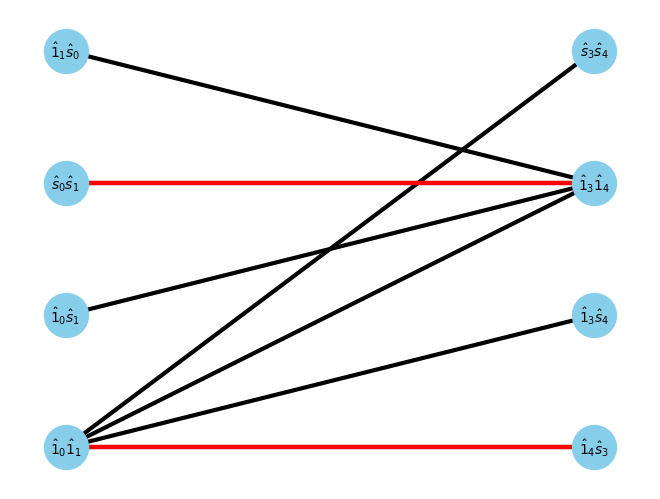

In [11]:
# Fill maxmatching with red
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=10, font_weight='bold', edge_color='black', width=3)
nx.draw_networkx_edges(G, pos, edgelist=max_matching.items(), edge_color='red', width=3)
plt.show()

In [12]:
min_cover = nx.bipartite.to_vertex_cover(G, max_matching)
min_cover

{'$\\hat{1}_0 \\hat{1}_1$', '$\\hat{1}_3 \\hat{1}_4$'}

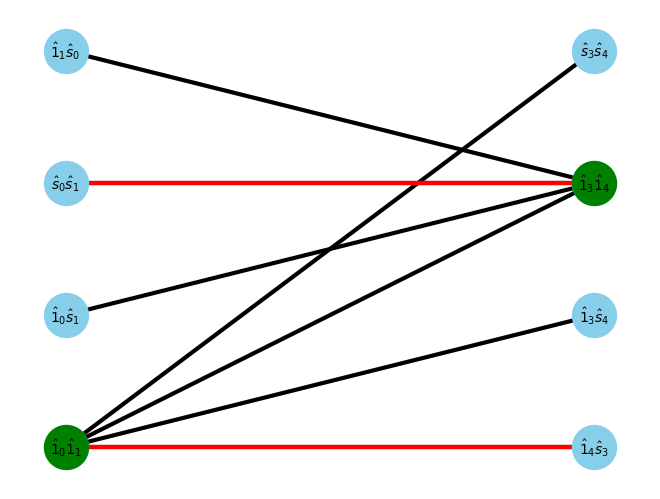

In [13]:
# Fill mincover with green
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=10, font_weight='bold', edge_color='black', width=3)
nx.draw_networkx_edges(G, pos, edgelist=max_matching.items(), edge_color='red', width=3)
nx.draw_networkx_nodes(G, pos, nodelist=min_cover, node_color='green', node_size=1000)
plt.show()

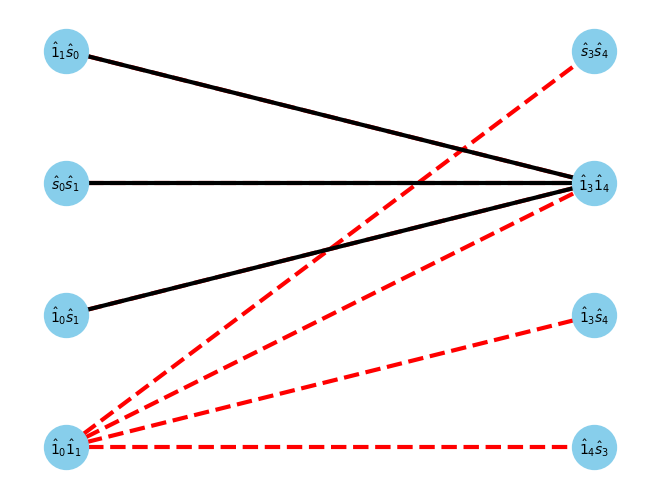

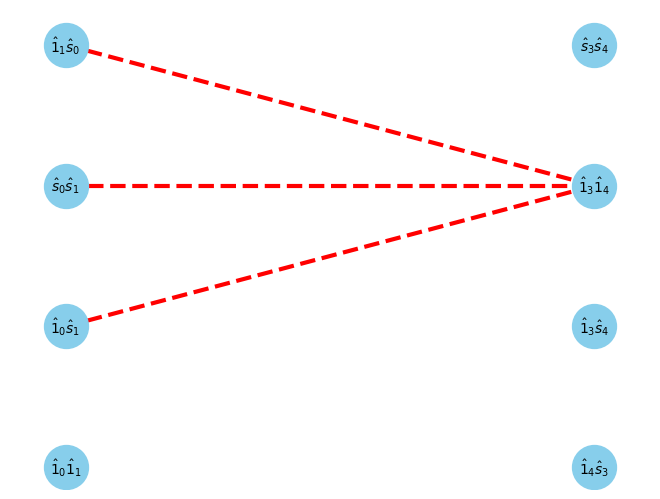

In [14]:
Unew = []
U1 = []
for vertex in min_cover:
    if vertex in U:
        Unew.append(vertex)
        # remove the edge connected to the vertex
        new_E = []
        for edge in E:
            if vertex != edge[0]:
                new_E.append(edge)
        # visualize the remaining edges and vertices
        G = nx.Graph()
        for node in U:
            G.add_node(node, bipartite=0)
        for node in V:
            G.add_node(node, bipartite=1)
        for edge in E:
            G.add_edge(edge[0], edge[1])
        E = new_E.copy() # 
        nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=10, font_weight='bold', edge_color='red', width=3, style='dashed')
        for new_edge in new_E:
            nx.draw_networkx_edges(G, pos, edgelist=[new_edge], edge_color='black', width=3,)
        plt.show()
    else:
        new_E = []
        vertex_U = 0
        for edge in E:
            if vertex != edge[1]:
                new_E.append(edge)
            else:
                vertex_U += sympy.Symbol(edge[0].strip('$'))
        Unew.append(str(vertex_U))
        # visualize the remaining edges and vertices
        G = nx.Graph()
        for node in U:
            G.add_node(node, bipartite=0)
        for node in V:
            G.add_node(node, bipartite=1)
        for edge in E:
            G.add_edge(edge[0], edge[1])
        E = new_E.copy() # 
        nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=10, font_weight='bold', edge_color='red', width=3, style='dashed')
        for new_edge in new_E:
            nx.draw_networkx_edges(G, pos, edgelist=[new_edge], edge_color='black', width=3,)
        plt.show()
    W_0to1 = sympy.zeros(1, len(Unew))
    for i, vertex in enumerate(Unew):
        W_0to1[0, i] = sympy.Symbol(vertex.strip('$'))
        U1.append(sympy.Symbol(vertex.strip('$')))


In [15]:
W_0to1

Matrix([[\hat{1}_0 \hat{1}_1, \hat{1}_0 \hat{s}_1 + \hat{1}_1 \hat{s}_0 + \hat{s}_0 \hat{s}_1]])

In [16]:
W0

Matrix([[\hat{1}_0, \hat{s}_0]])

In [17]:
W1 = sympy.zeros(W0.shape[1], W_0to1.shape[1])
W1[1, 1] = get_eye_site(1).symbol + spin_ops[1].symbol
W1[0, 0] = get_eye_site(1).symbol
W1[0, 1] = spin_ops[1].symbol
W1

Matrix([
[\hat{1}_1,             \hat{s}_1],
[        0, \hat{1}_1 + \hat{s}_1]])

In [18]:
W01 = (W0 @ W1).expand()

In [19]:
sympy.latex(W01[0])

'\\hat{1}_0 \\hat{1}_1'

In [20]:
sympy.latex(W_0to1[0])

'\\hat{1}_0 \\hat{1}_1'

In [21]:
W01[0] == W_0to1[0]

False

In [ ]:
Usym = set()
Vsym = set()
Esym = set()
i = 3
for prod_op in Ising.ops:
    U_0toi = prod_op[0:i]
    #U_i = prod_op[i]
    # 本当は、U_iとU0の積を取る必要がある。（未実装)
    # そのためには、SumOfProducts全体でクラスタリングされた情報を格納する必要がある。
    
    V_op = prod_op[i+1:ndim]
    raise NotImplementedError
    U_op = U_0toi
    
    Usym.add(U_op)
    
    Vsym.add(V_op)
    Esym.add((U_op, V_op))

U = [f"${sympy.latex(node)}$" for node in Usym]
V = [f"${sympy.latex(node)}$" for node in Vsym]
E = [(f"${sympy.latex(edge[0])}$", f"${sympy.latex(edge[1])}$") for edge in Esym]


G = nx.Graph()
for node in U:
    G.add_node(node, bipartite=0)
for node in V:
    G.add_node(node, bipartite=1)
for edge in E:
    G.add_edge(edge[0], edge[1])


pos = {node: (0, i) for i, node in enumerate(U)} 
pos |= {node: (1, i) for i, node in enumerate(V)}
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=10, font_weight='bold', edge_color='black', width=3)
plt.show()